# Imports and Load the Dataset

In [1]:
import pandas as pd

df = pd.read_csv('..\data\Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
print('Shape of the dataset: ', df.shape)

print('\nType of the data: \n',df.dtypes)

print("\nNull values in the dataset:\n ",df.isnull().sum())

Shape of the dataset:  (7043, 21)

Type of the data: 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Null values in the dataset:
  customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
Stre

# Clean Data Types & Missing Values

In [5]:
# convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nChecking for Duplicate Rows: ", df.duplicated().sum())

# Drop customerID
df.drop(columns='customerID', inplace=True)


Checking for Duplicate Rows:  0


# EDA — Churn Distribution, Tenure, Charges

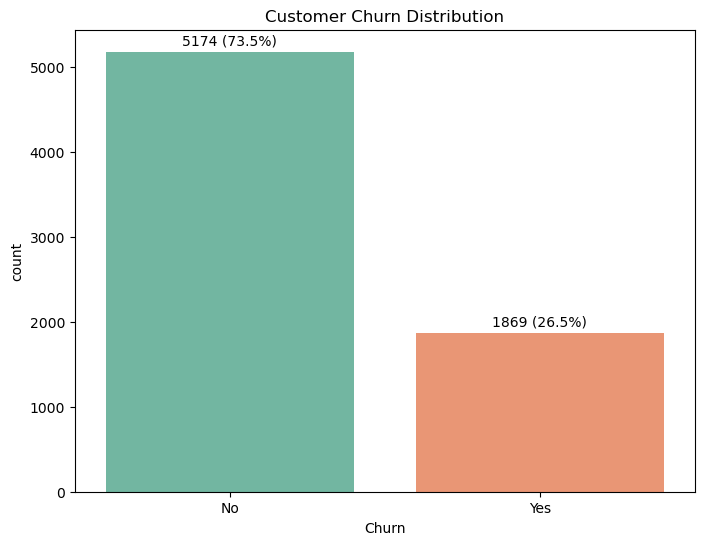

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('..\output', exist_ok=True)

# Churn Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df, palette='Set2',hue='Churn')
plt.title('Customer Churn Distribution')

for bar in ax.patches:
    count = int(bar.get_height())
    percentage = count / len(df) * 100
    ax.text(bar.get_x() + bar.get_width()/2, count+50, f'{count} ({percentage:.1f}%)', 
            ha='center', va='bottom')
    
plt.savefig('..\\output\\churn_distribution.png')
plt.show()

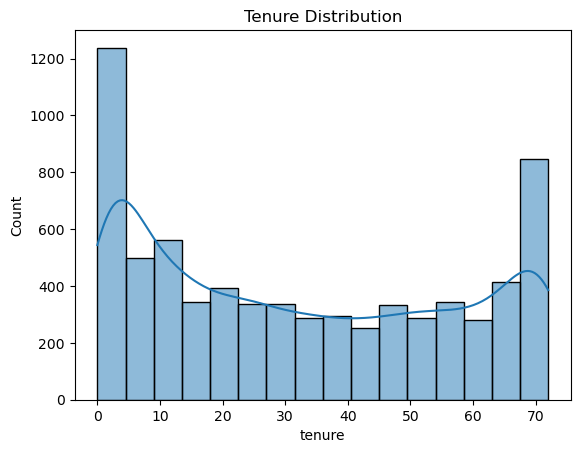

In [20]:
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure Distribution')
plt.savefig('../output/tenure_distribution.png')
plt.show()

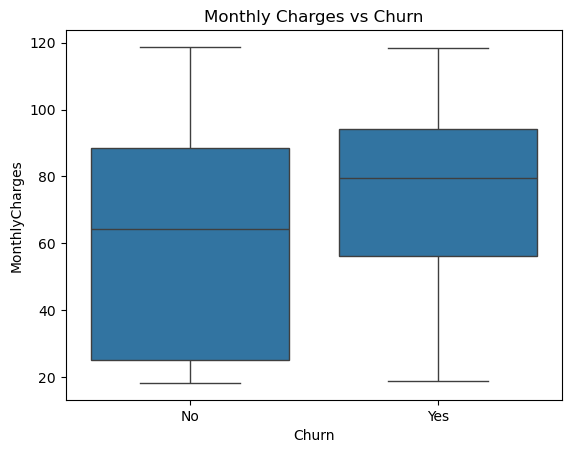

In [22]:
# Monthly Charges Boxplot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.savefig('../output/monthly_charges_boxplot.png')
plt.show()